In [1]:
import spatialproteomics as sp
from skimage.io import imread
import matplotlib.pyplot as plt
from scipy.signal import medfilt2d
import pandas as pd


In [28]:
image_2_4 = imread("/dss/dsshome1/00/ge65tib2/2-4__HE__histo.ome.tif")
image_5_5 = imread("/dss/dsshome1/00/ge65tib2/5-5__HE__histo.ome.tif")

image_2_4.shape
image_5_5.shape

image_2_4 = image_2_4.transpose(2, 0, 1)
image_2_4.shape

image_5_5 = image_5_5.transpose(2, 0, 1)
image_5_5.shape

(40, 2792, 3084)

In [29]:
markers = ['DAPI', 'SOX2', 'FAP', 'cxcr3', 'LRRC15', 'CD20', 'CD68', 'CD45RO', 'CD31', 'PD-1', 'Ki67', 'Keratin 5', 'CD4', 'IFNG', 'SMA', 'CD66', 'Podoplanin', 'CXCR4', 'PGRN', 'Granzyme B', 'Pan-Cytokeratin', 'MARCO', 'CD56', 'HAS1', 'CD107a', 'b-Catenin1', 'HLA-A', 'HLA-DR', 'CD8', 'PDL1', 'TP63', 'GATA6', 'CD34', 'TCF-1', 'Bcl-2', 'PCNA', 'CLDN18', 'CD3e', 'MCT4', 'LAG3']
sp_object_2_4 = sp.load_image_data(image_2_4, channel_coords=markers)
sp_object_5_5 = sp.load_image_data(image_5_5, channel_coords=markers)



In [30]:
sp_object_2_4

<xarray.Dataset> Size: 265MB
Dimensions:   (channels: 40, y: 2501, x: 2644)
Coordinates:
  * channels  (channels) <U15 2kB 'DAPI' 'SOX2' 'FAP' ... 'CD3e' 'MCT4' 'LAG3'
  * y         (y) int64 20kB 0 1 2 3 4 5 6 ... 2495 2496 2497 2498 2499 2500
  * x         (x) int64 21kB 0 1 2 3 4 5 6 ... 2638 2639 2640 2641 2642 2643
Data variables:
    _image    (channels, y, x) uint8 265MB 2 2 3 2 2 2 2 2 2 ... 3 2 1 2 2 1 1 1

In [31]:
sp_object_5_5

<xarray.Dataset> Size: 344MB
Dimensions:   (channels: 40, y: 2792, x: 3084)
Coordinates:
  * channels  (channels) <U15 2kB 'DAPI' 'SOX2' 'FAP' ... 'CD3e' 'MCT4' 'LAG3'
  * y         (y) int64 22kB 0 1 2 3 4 5 6 ... 2786 2787 2788 2789 2790 2791
  * x         (x) int64 25kB 0 1 2 3 4 5 6 ... 3078 3079 3080 3081 3082 3083
Data variables:
    _image    (channels, y, x) uint8 344MB 2 2 2 1 1 2 1 2 1 ... 2 2 1 2 2 2 2 2

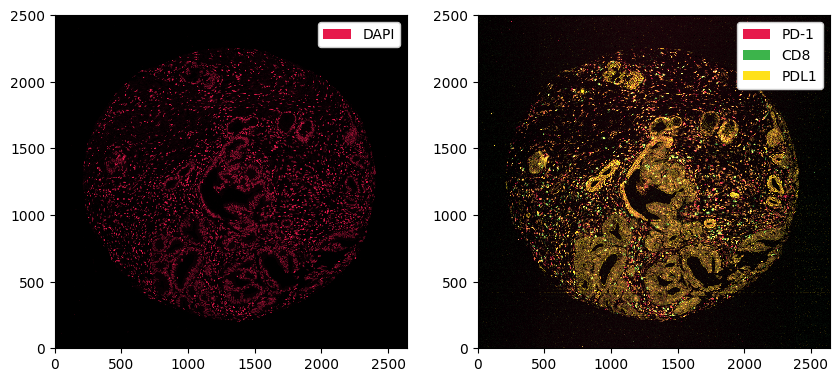

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
_ = sp_object_2_4.pp["DAPI"].pl.show(ax=ax[0])

_ = sp_object_2_4.pp[['PD-1', 'CD8', 'PDL1']].pl.show(ax=ax[1])


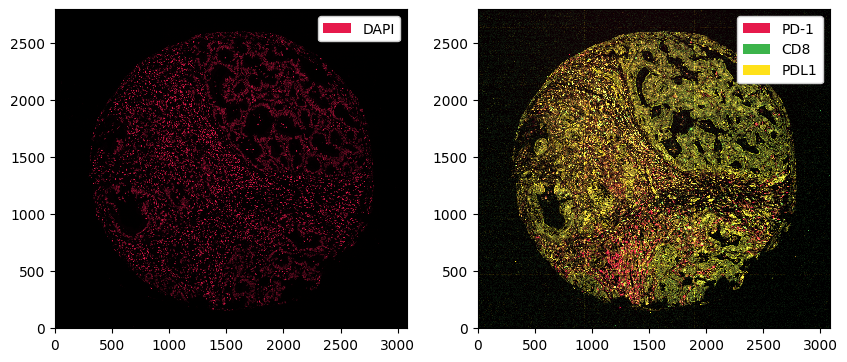

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
_ = sp_object_5_5.pp["DAPI"].pl.show(ax=ax[0])

_ = sp_object_5_5.pp[['PD-1', 'CD8', 'PDL1']].pl.show(ax=ax[1])

In [38]:
ds_cellpose_2_4 = sp_object_2_4.tl.cellpose(channel="DAPI", model_type='nuclei', flow_threshold=0.6)

** TORCH CUDA version installed and working. **
>>>> using GPU (CUDA)
>>>> loading model /dss/dsshome1/00/ge65tib2/.cellpose/models/cpsam


In [39]:
ds_cellpose_5_5 = sp_object_5_5.tl.cellpose(channel="DAPI", model_type='nuclei', flow_threshold=0.6)


** TORCH CUDA version installed and working. **
>>>> using GPU (CUDA)
>>>> loading model /dss/dsshome1/00/ge65tib2/.cellpose/models/cpsam


In [40]:
ds_cellpose_2_4

<xarray.Dataset> Size: 278MB
Dimensions:        (channels: 40, y: 2501, x: 2644, cells: 7153, features: 2)
Coordinates:
  * channels       (channels) <U15 2kB 'DAPI' 'SOX2' 'FAP' ... 'MCT4' 'LAG3'
  * y              (y) int64 20kB 0 1 2 3 4 5 ... 2495 2496 2497 2498 2499 2500
  * x              (x) int64 21kB 0 1 2 3 4 5 ... 2638 2639 2640 2641 2642 2643
  * cells          (cells) int64 57kB 1 2 3 4 5 6 ... 7149 7150 7151 7152 7153
  * features       (features) <U10 80B 'centroid-0' 'centroid-1'
Data variables:
    _image         (channels, y, x) uint8 265MB 2 2 3 2 2 2 2 ... 2 1 2 2 1 1 1
    _segmentation  (y, x) uint16 13MB 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    _obs           (cells, features) float64 114kB 62.72 1.457e+03 ... 1.027e+03

In [41]:
ds_cellpose_5_5

<xarray.Dataset> Size: 362MB
Dimensions:        (channels: 40, y: 2792, x: 3084, cells: 10827, features: 2)
Coordinates:
  * channels       (channels) <U15 2kB 'DAPI' 'SOX2' 'FAP' ... 'MCT4' 'LAG3'
  * y              (y) int64 22kB 0 1 2 3 4 5 ... 2786 2787 2788 2789 2790 2791
  * x              (x) int64 25kB 0 1 2 3 4 5 ... 3078 3079 3080 3081 3082 3083
  * cells          (cells) int64 87kB 1 2 3 4 5 ... 10824 10825 10826 10827
  * features       (features) <U10 80B 'centroid-0' 'centroid-1'
Data variables:
    _image         (channels, y, x) uint8 344MB 2 2 2 1 1 2 1 ... 2 1 2 2 2 2 2
    _segmentation  (y, x) uint16 17MB 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    _obs           (cells, features) float64 173kB 153.6 1.484e+03 ... 1.654e+03

In [42]:
help(sp_object_2_4.tl.stardist)

Help on method stardist in module spatialproteomics.tl.tool:

stardist(channel: Optional[str] = None, key_added: str = '_segmentation', scale: float = 3, n_tiles: int = 12, normalize: bool = True, predict_big: bool = False, postprocess_func: Callable = <function ToolAccessor.<lambda> at 0x7fdf9ef9e5f0>, **kwargs) -> xarray.core.dataset.Dataset method of spatialproteomics.tl.tool.ToolAccessor instance
    Apply StarDist algorithm to perform instance segmentation on the nuclear image.
    
    Parameters
    ----------
    channel : str, optional
        Channel to use for segmentation. If None, all channels are used.
    key_added : str, optional
        Key to write the segmentation results to.
    scale : float, optional
        Scaling factor for the StarDist model (default is 3).
    n_tiles : int, optional
        Number of tiles to split the image into for prediction (default is 12).
    normalize : bool, optional
        Flag indicating whether to normalize the nuclear image (def

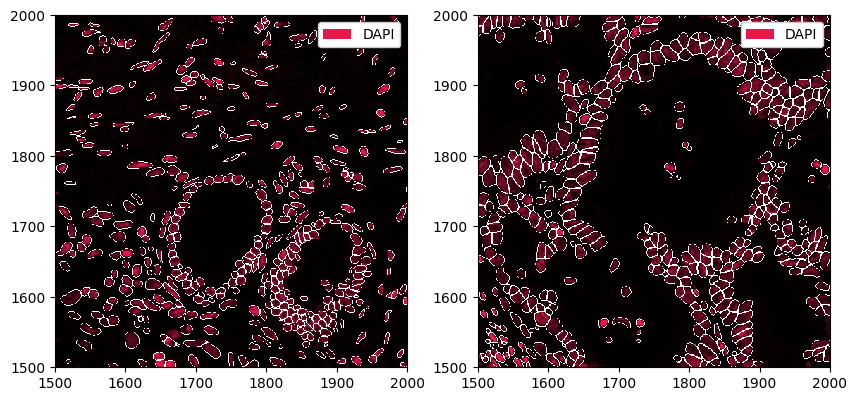

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# pp[100:200, 100:200] zoom in
_ = ds_cellpose_2_4.pp["DAPI"].pp[1500:2000, 1500:2000].pl.show(render_segmentation=True, ax=ax[0])
_ = ds_cellpose_5_5.pp["DAPI"].pp[1500:2000, 1500:2000].pl.show(render_segmentation=True, ax=ax[1])


In [34]:
ds_stardist_2_4 = sp_object_2_4.tl.stardist(channel="DAPI", key_added="_segmentation")
ds_stardist_5_5 = sp_object_5_5.tl.stardist(channel="DAPI", key_added="_segmentation")


Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


100%|██████████| 144/144 [00:56<00:00,  2.56it/s]


Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


100%|██████████| 144/144 [01:06<00:00,  2.16it/s]


In [35]:
ds_stardist_2_4

<xarray.Dataset> Size: 291MB
Dimensions:        (channels: 40, y: 2501, x: 2644, cells: 8259, features: 2)
Coordinates:
  * channels       (channels) <U15 2kB 'DAPI' 'SOX2' 'FAP' ... 'MCT4' 'LAG3'
  * y              (y) int64 20kB 0 1 2 3 4 5 ... 2495 2496 2497 2498 2499 2500
  * x              (x) int64 21kB 0 1 2 3 4 5 ... 2638 2639 2640 2641 2642 2643
  * cells          (cells) int64 66kB 1 2 3 4 5 6 ... 8255 8256 8257 8258 8259
  * features       (features) <U10 80B 'centroid-0' 'centroid-1'
Data variables:
    _image         (channels, y, x) uint8 265MB 2 2 3 2 2 2 2 ... 2 1 2 2 1 1 1
    _segmentation  (y, x) int32 26MB 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    _obs           (cells, features) float64 132kB 1.022e+03 682.3 ... 873.0

In [36]:
ds_stardist_5_5

<xarray.Dataset> Size: 379MB
Dimensions:        (channels: 40, y: 2792, x: 3084, cells: 13843, features: 2)
Coordinates:
  * channels       (channels) <U15 2kB 'DAPI' 'SOX2' 'FAP' ... 'MCT4' 'LAG3'
  * y              (y) int64 22kB 0 1 2 3 4 5 ... 2786 2787 2788 2789 2790 2791
  * x              (x) int64 25kB 0 1 2 3 4 5 ... 3078 3079 3080 3081 3082 3083
  * cells          (cells) int64 111kB 1 2 3 4 5 ... 13840 13841 13842 13843
  * features       (features) <U10 80B 'centroid-0' 'centroid-1'
Data variables:
    _image         (channels, y, x) uint8 344MB 2 2 2 1 1 2 1 ... 2 1 2 2 2 2 2
    _segmentation  (y, x) int32 34MB 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    _obs           (cells, features) float64 221kB 894.4 1.773e+03 ... 2.748e+03

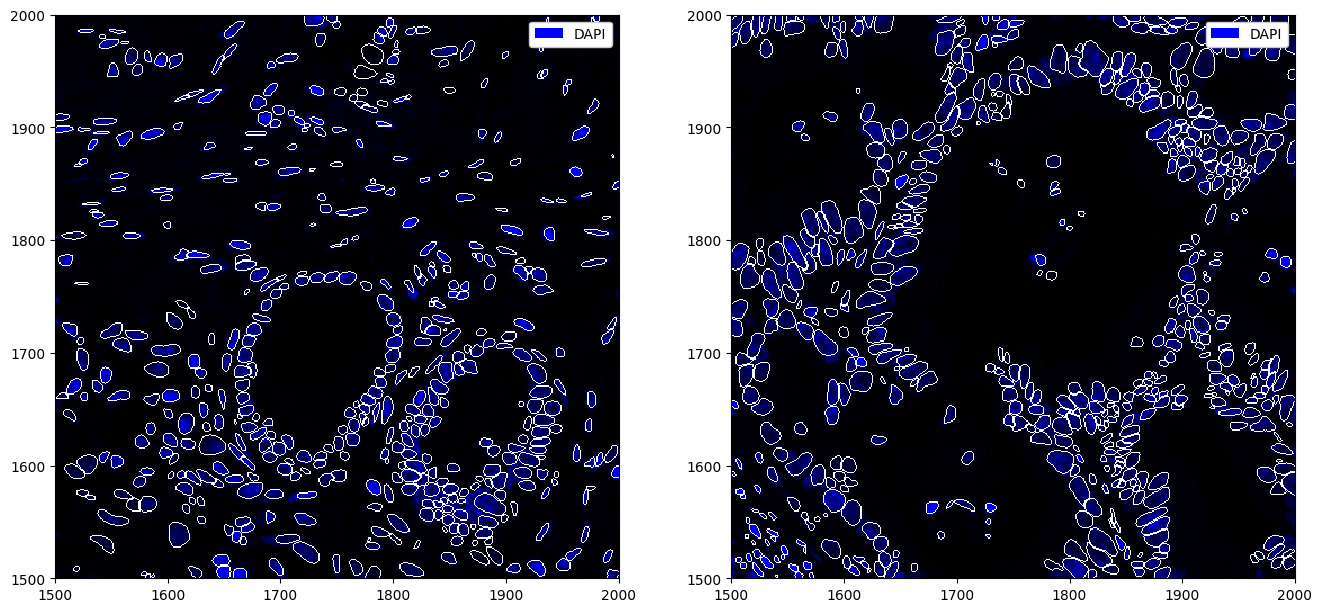

In [37]:
# plotting the segmentation
fix, ax = plt.subplots(1, 2, figsize=(16, 8))
_ = ds_stardist_2_4.pp["DAPI"].pp[1500:2000, 1500:2000].pl.colorize("blue").pl.show(render_segmentation=True, ax=ax[0])
_ = ds_stardist_5_5.pp["DAPI"].pp[1500:2000, 1500:2000].pl.colorize("blue").pl.show(render_segmentation=True, ax=ax[1])


area           15.000000
centroid-0     46.966667
centroid-1    212.380000
dtype: float64

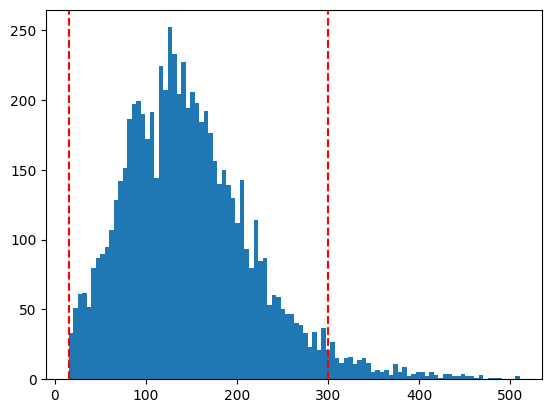

In [49]:
ds_cellpose_2_4 = ds_cellpose_2_4.pp.add_observations("area")
df_cellpose_2_4 = ds_cellpose_2_4.pp.get_layer_as_df("_obs")
_ = plt.hist(df_cellpose_2_4["area"], bins=100)
_ = plt.axvline(x=15, color='red', linestyle='--', label='x = 50')
_ = plt.axvline(x=300, color='red', linestyle='--', label='x = 250')
Min_value= df_cellpose_2_4.min()
Min_value

area           15.000000
centroid-0    152.142857
centroid-1    290.702703
dtype: float64

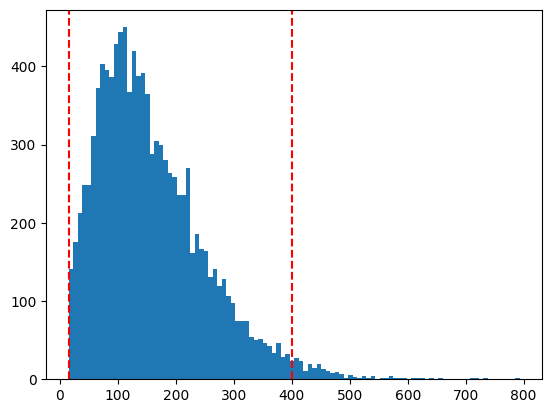

In [52]:
ds_cellpose_5_5 = ds_cellpose_5_5.pp.add_observations("area")
df_cellpose_5_5 = ds_cellpose_5_5.pp.get_layer_as_df("_obs")
_ = plt.hist(df_cellpose_5_5["area"], bins=100)
_ = plt.axvline(x=15, color='red', linestyle='--', label='x = 50')
_ = plt.axvline(x=400, color='red', linestyle='--', label='x = 250')
Min_value= df_cellpose_5_5.min()
Min_value

area            4.000000
centroid-0    120.790323
centroid-1    118.500000
dtype: float64

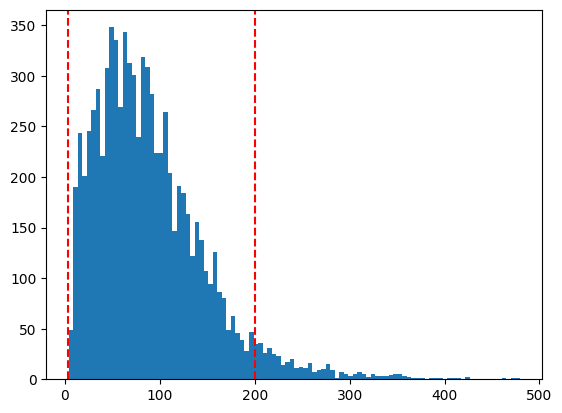

In [54]:
ds_stardist_2_4 = ds_stardist_2_4.pp.add_observations("area")
df_stardist_2_4 = ds_stardist_2_4.pp.get_layer_as_df("_obs")
_ = plt.hist(df_stardist_2_4["area"], bins=100)
_ = plt.axvline(x=3, color='red', linestyle='--', label='x = 50')
_ = plt.axvline(x=200, color='red', linestyle='--', label='x = 250')
Min_value= df_stardist_2_4.min()
Min_value


area            4.000000
centroid-0    149.928571
centroid-1    290.500000
dtype: float64

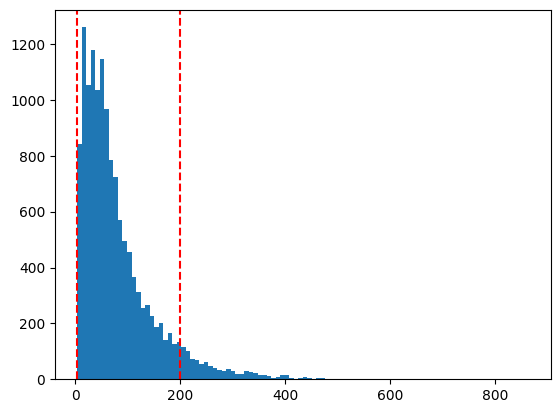

In [55]:
ds_stardist_5_5 = ds_stardist_5_5.pp.add_observations("area")
df_stardist_5_5 = ds_stardist_5_5.pp.get_layer_as_df("_obs")
_ = plt.hist(df_stardist_5_5["area"], bins=100)
_ = plt.axvline(x=3, color='red', linestyle='--', label='x = 50')
_ = plt.axvline(x=200, color='red', linestyle='--', label='x = 250')
Min_value= df_stardist_5_5.min()
Min_value

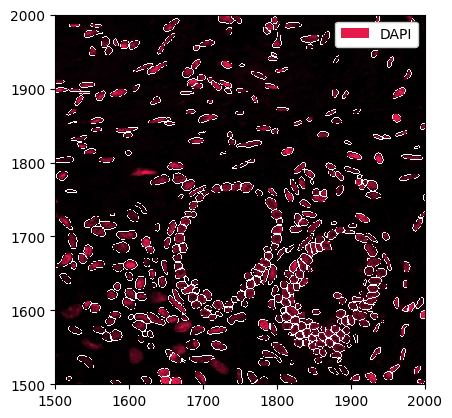

In [56]:
ds_cellpose_2_4 = ds_cellpose_2_4.pp.filter_by_obs("area", func=lambda x: (x > 15) & (x < 300))
# plotting the result
_ = ds_cellpose_2_4.pp["DAPI"].pp[1500:2000, 1500:2000].pl.show(render_segmentation=True)



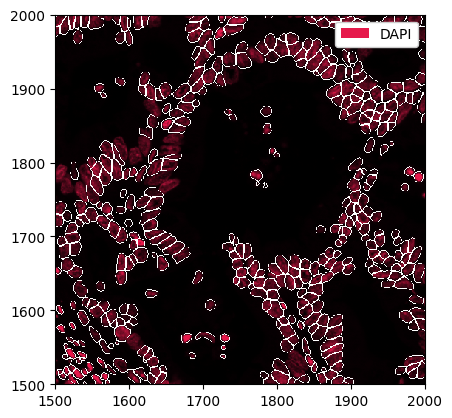

In [57]:
ds_cellpose_5_5 = ds_cellpose_5_5.pp.filter_by_obs("area", func=lambda x: (x > 15) & (x < 400))
# plotting the result
_ = ds_cellpose_5_5.pp["DAPI"].pp[1500:2000, 1500:2000].pl.show(render_segmentation=True)


In [58]:
ds_cellpose_2_4 = ds_cellpose_2_4.pp.grow_cells(iterations=2)
ds_cellpose_2_4

Mask growing requires recalculation of the observations. All features other than the centroids will be removed and should be recalculated with pp.add_observations().


<xarray.Dataset> Size: 278MB
Dimensions:        (channels: 40, y: 2501, x: 2644, cells: 6888, features: 2)
Coordinates:
  * channels       (channels) <U15 2kB 'DAPI' 'SOX2' 'FAP' ... 'MCT4' 'LAG3'
  * y              (y) int64 20kB 0 1 2 3 4 5 ... 2495 2496 2497 2498 2499 2500
  * x              (x) int64 21kB 0 1 2 3 4 5 ... 2638 2639 2640 2641 2642 2643
  * cells          (cells) int64 55kB 1 2 3 4 5 6 ... 6884 6885 6886 6887 6888
  * features       (features) <U10 80B 'centroid-0' 'centroid-1'
Data variables:
    _image         (channels, y, x) uint8 265MB 2 2 3 2 2 2 2 ... 2 1 2 2 1 1 1
    _segmentation  (y, x) uint16 13MB 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    _obs           (cells, features) float64 110kB 62.87 1.457e+03 ... 1.027e+03

In [59]:
ds_cellpose_5_5 = ds_cellpose_5_5.pp.grow_cells(iterations=2)
ds_cellpose_5_5

Mask growing requires recalculation of the observations. All features other than the centroids will be removed and should be recalculated with pp.add_observations().


<xarray.Dataset> Size: 362MB
Dimensions:        (channels: 40, y: 2792, x: 3084, cells: 10593, features: 2)
Coordinates:
  * channels       (channels) <U15 2kB 'DAPI' 'SOX2' 'FAP' ... 'MCT4' 'LAG3'
  * y              (y) int64 22kB 0 1 2 3 4 5 ... 2786 2787 2788 2789 2790 2791
  * x              (x) int64 25kB 0 1 2 3 4 5 ... 3078 3079 3080 3081 3082 3083
  * cells          (cells) int64 85kB 1 2 3 4 5 ... 10590 10591 10592 10593
  * features       (features) <U10 80B 'centroid-0' 'centroid-1'
Data variables:
    _image         (channels, y, x) uint8 344MB 2 2 2 1 1 2 1 ... 2 1 2 2 2 2 2
    _segmentation  (y, x) uint16 17MB 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    _obs           (cells, features) float64 169kB 153.6 1.484e+03 ... 1.654e+03

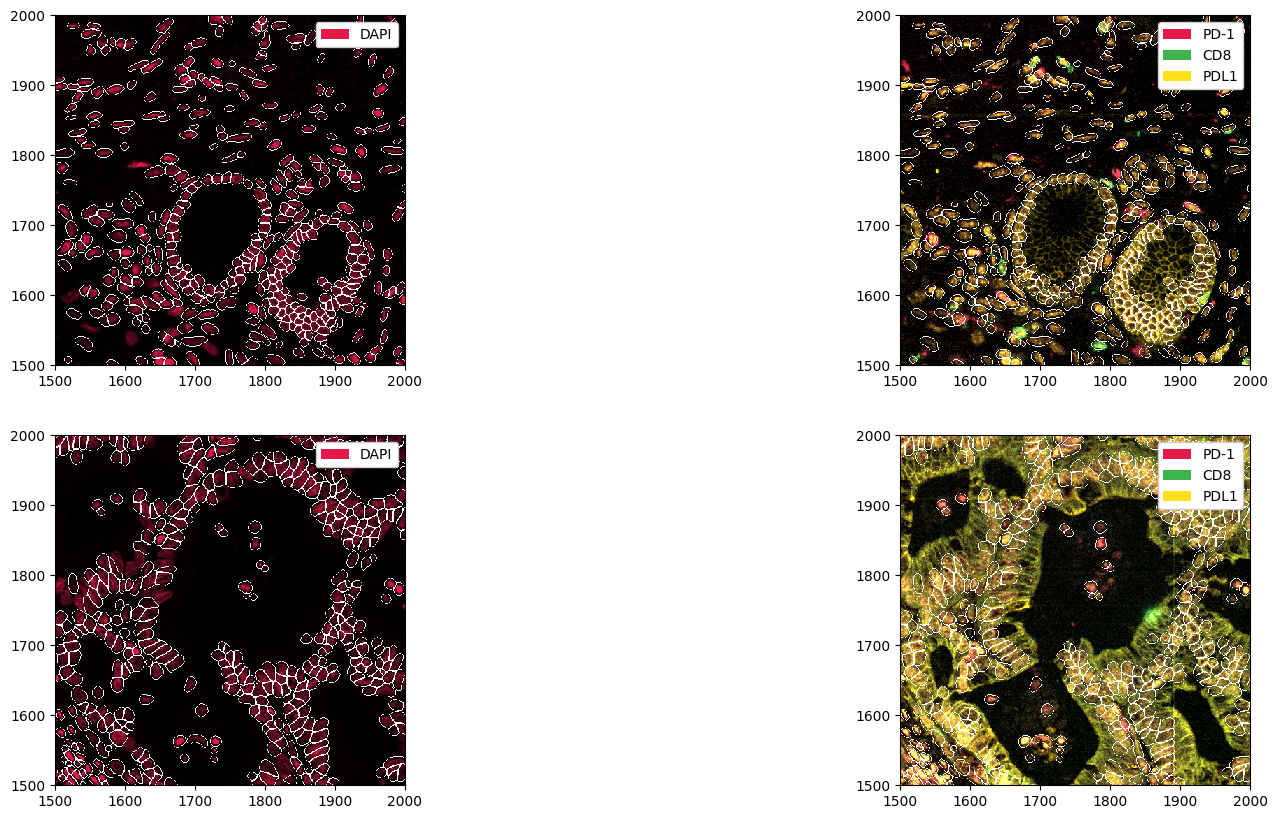

In [60]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
_ = ds_cellpose_2_4.pp["DAPI"].pp[1500:2000, 1500:2000].pl.show(render_segmentation=True, ax=ax[0,0])
_ = ds_cellpose_2_4.pp[['PD-1', 'CD8', 'PDL1']].pp[1500:2000, 1500:2000].pl.show(render_segmentation=True, ax=ax[0,1])
_ = ds_cellpose_5_5.pp["DAPI"].pp[1500:2000, 1500:2000].pl.show(render_segmentation=True, ax=ax[1,0])
_ = ds_cellpose_5_5.pp[['PD-1', 'CD8', 'PDL1']].pp[1500:2000, 1500:2000].pl.show(render_segmentation=True, ax=ax[1,1])

In [ ]:
help(sp_object.pp.transform_expression_matrix)

Help on method transform_expression_matrix in module spatialproteomics.pp.preprocessing:

transform_expression_matrix(method: str = 'arcsinh', key: str = '_intensity', key_added: str = '_intensity', cofactor: float = 5.0, min_percentile: float = 1.0, max_percentile: float = 99.0, **kwargs) method of spatialproteomics.pp.preprocessing.PreprocessingAccessor instance
    Transforms the expression matrix based on the specified mode.
    
    Parameters:
        method (str): The transformation method. Available options are "arcsinh", "zscore", "minmax", "double_zscore", and "clip".
        key (str): The key of the expression matrix in the object.
        key_added (str): The key to assign to the transformed matrix in the object.
        cofactor (float): The cofactor to use for the "arcsinh" transformation.
        min_percentile (float): The minimum percentile value to use for the "clip" transformation.
        max_percentile (float): The maximum percentile value to use for the "clip" tr

In [61]:
def multiply_array(arr, factor=10):
    return (arr * factor).clip(0, 255).astype("uint8")

percentiles = [0.95] * 40

ds_cellpose_2_4 = ds_cellpose_2_4.pp.threshold(percentiles).pp.apply(medfilt2d, kernel_size=3)
ds_cellpose_2_4 = ds_cellpose_2_4.pp.apply(func=multiply_array)
ds_cellpose_5_5 = ds_cellpose_5_5.pp.threshold(percentiles).pp.apply(medfilt2d, kernel_size=3)
ds_cellpose_5_5 = ds_cellpose_5_5.pp.apply(func=multiply_array)

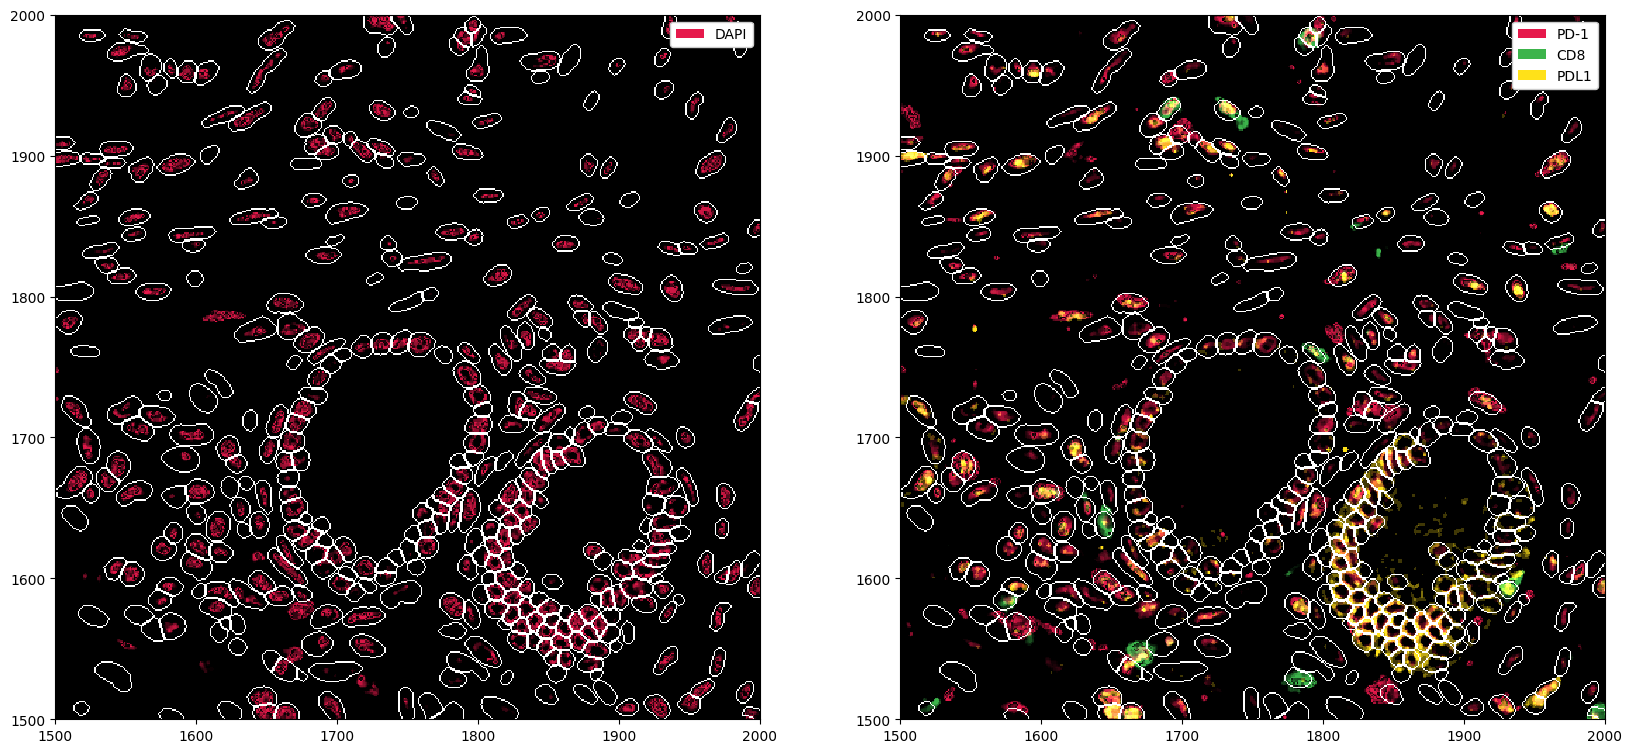

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
_ = ds_cellpose_2_4.pp["DAPI"].pp[1500:2000, 1500:2000].pl.show(render_segmentation=True, ax=ax[0])
_ = ds_cellpose_2_4.pp[['PD-1', 'CD8', 'PDL1']].pp[1500:2000, 1500:2000].pl.show(render_segmentation=True,ax=ax[1])

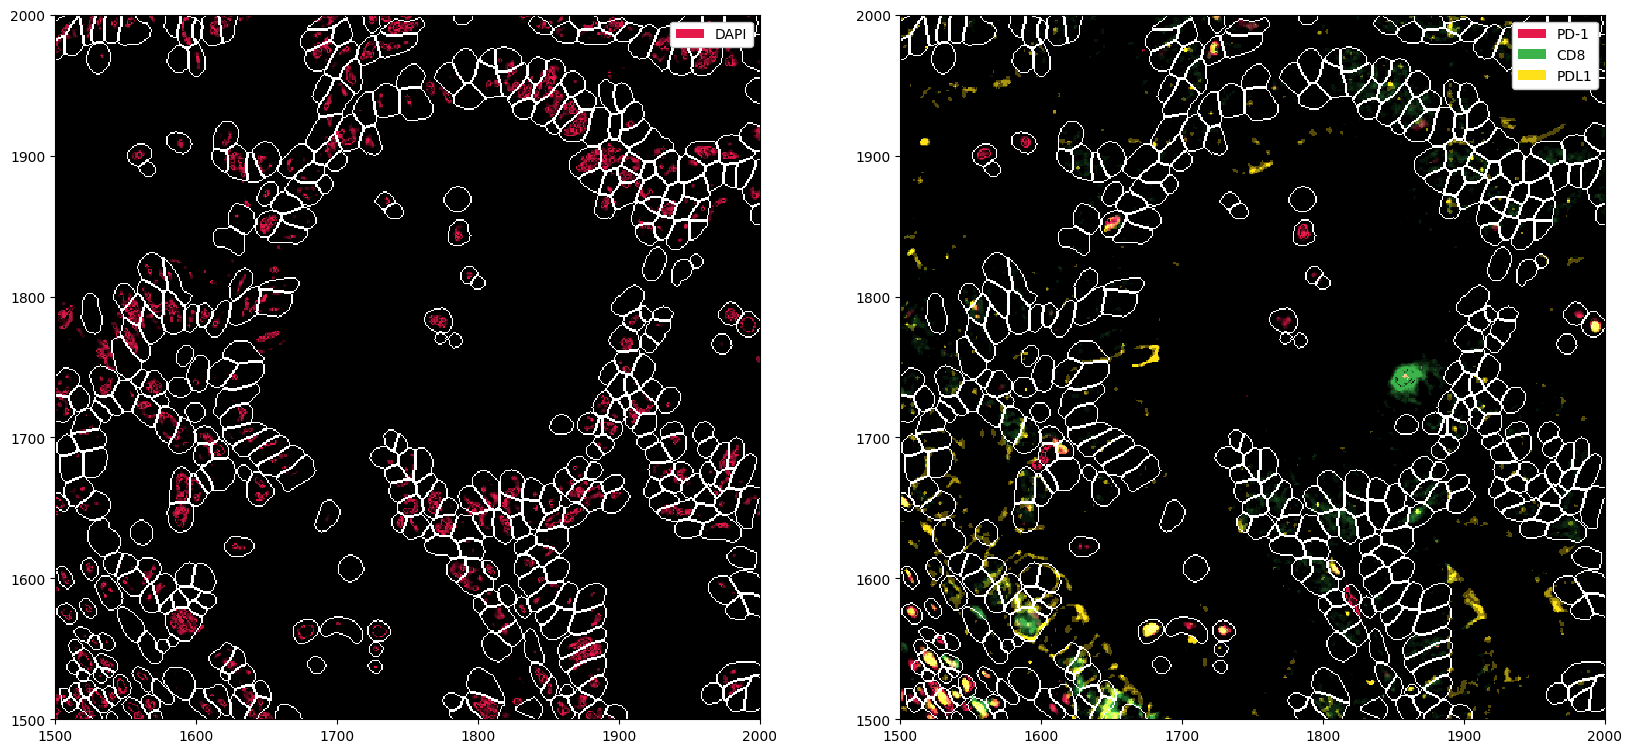

In [69]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
_ = ds_cellpose_5_5.pp["DAPI"].pp[1500:2000, 1500:2000].pl.show(render_segmentation=True, ax=ax[0])
_ = ds_cellpose_5_5.pp[['PD-1', 'CD8', 'PDL1']].pp[1500:2000, 1500:2000].pl.show(render_segmentation=True,ax=ax[1])

In [70]:
import os
import shutil

In [71]:
# other methods called  "arcsinh", "zscore", "minmax", "double_zscore", and "clip'
sp_object_1= ds_cellpose_2_4.pp.add_quantification(func="intensity_mean").pp.transform_expression_matrix(method="arcsinh")
sp_object_1

# putting the expression matrix into an anndata object
adata = sp_object_1.tl.convert_to_anndata(
    expression_matrix_key="_intensity",
)

adata
adata.write("/dss/dsshome1/00/ge65tib2/Spatialproteomics/ds_cellpose_2_4_arcsinh.h5ad")

zarr_path = "/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/ds_cellpose_2_4_arcsinh.zarr"

# removing the zarr if it exists
if os.path.exists(zarr_path):
    shutil.rmtree(zarr_path)
    
# exporting as zarr
sp_object_1.drop_encoding().to_zarr("/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/ds_cellpose_2_4_arcsinh.zarr")

In [72]:
# other methods called  "arcsinh", "zscore", "minmax", "double_zscore", and "clip'
sp_object_6= ds_cellpose_5_5.pp.add_quantification(func="intensity_mean").pp.transform_expression_matrix(method="arcsinh")
sp_object_6

# putting the expression matrix into an anndata object
adata = sp_object_6.tl.convert_to_anndata(
    expression_matrix_key="_intensity",
)

adata
adata.write("/dss/dsshome1/00/ge65tib2/Spatialproteomics/ds_cellpose_5_5_arcsinh.h5ad")

zarr_path = "/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/ds_cellpose_5_5_arcsinh.zarr"

# removing the zarr if it exists
if os.path.exists(zarr_path):
    shutil.rmtree(zarr_path)
    
# exporting as zarr
sp_object_6.drop_encoding().to_zarr("/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/ds_cellpose_5_5_arcsinh.zarr")

In [74]:
sp_object_2= ds_cellpose_2_4.pp.add_quantification(func="intensity_mean").pp.transform_expression_matrix(method="zscore")
sp_object_2

# putting the expression matrix into an anndata object
adata = sp_object_2.tl.convert_to_anndata(
    expression_matrix_key="_intensity",
)

adata
adata.write("/dss/dsshome1/00/ge65tib2/Spatialproteomics/ds_cellpose_2_4_zscore.h5ad")

zarr_path = "/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/ds_cellpose_2_4_zscore.zarr"

# removing the zarr if it exists
if os.path.exists(zarr_path):
    shutil.rmtree(zarr_path)

# exporting as zarr
sp_object_2.drop_encoding().to_zarr("/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/ds_cellpose_2_4_zscore.zarr")

In [75]:
sp_object_7= ds_cellpose_5_5.pp.add_quantification(func="intensity_mean").pp.transform_expression_matrix(method="zscore")
sp_object_7

# putting the expression matrix into an anndata object
adata = sp_object_7.tl.convert_to_anndata(
    expression_matrix_key="_intensity",
)

adata
adata.write("/dss/dsshome1/00/ge65tib2/Spatialproteomics/ds_cellpose_5_5_zscore.h5ad")

zarr_path = "/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/ds_cellpose_5_5_zscore.zarr"

# removing the zarr if it exists
if os.path.exists(zarr_path):
    shutil.rmtree(zarr_path)

# exporting as zarr
sp_object_7.drop_encoding().to_zarr("/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/ds_cellpose_5_5_zscore.zarr")

In [76]:
sp_object_3= ds_cellpose_2_4.pp.add_quantification(func="intensity_mean").pp.transform_expression_matrix(method="double_zscore")
sp_object_3

# putting the expression matrix into an anndata object
adata = sp_object_3.tl.convert_to_anndata(
    expression_matrix_key="_intensity",
)

adata
adata.write("/dss/dsshome1/00/ge65tib2/Spatialproteomics/ds_cellpose_2_4_double_zscore.h5ad")

zarr_path = "/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/ds_cellpose_2_4_double_zscore.zarr"

# removing the zarr if it exists
if os.path.exists(zarr_path):
    shutil.rmtree(zarr_path)

# exporting as zarr
sp_object_3.drop_encoding().to_zarr("/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/ds_cellpose_2_4_double_zscore.zarr")

In [77]:
sp_object_8= ds_cellpose_5_5.pp.add_quantification(func="intensity_mean").pp.transform_expression_matrix(method="double_zscore")
sp_object_8

# putting the expression matrix into an anndata object
adata = sp_object_8.tl.convert_to_anndata(
    expression_matrix_key="_intensity",
)

adata
adata.write("/dss/dsshome1/00/ge65tib2/Spatialproteomics/ds_cellpose_5_5_double_zscore.h5ad")

zarr_path = "/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/ds_cellpose_5_5_double_zscore.zarr"

# removing the zarr if it exists
if os.path.exists(zarr_path):
    shutil.rmtree(zarr_path)

# exporting as zarr
sp_object_8.drop_encoding().to_zarr("/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/ds_cellpose_5_5_double_zscore.zarr")

In [78]:
sp_object_4 = ds_cellpose_2_4.pp.add_quantification(func="intensity_mean").pp.transform_expression_matrix(method="minmax")
sp_object_4

# putting the expression matrix into an anndata object
adata = sp_object_4.tl.convert_to_anndata(
    expression_matrix_key="_intensity",
)

adata
adata.write("/dss/dsshome1/00/ge65tib2/Spatialproteomics/ds_cellpose_2_4_minmax.h5ad")

zarr_path = "/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/ds_cellpose_2_4_minmax.zarr"

# removing the zarr if it exists
if os.path.exists(zarr_path):
    shutil.rmtree(zarr_path)

# exporting as zarr
sp_object_4.drop_encoding().to_zarr("/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/ds_cellpose_2_4_minmax.zarr")

In [79]:
sp_object_9 = ds_cellpose_5_5.pp.add_quantification(func="intensity_mean").pp.transform_expression_matrix(method="minmax")
sp_object_9

# putting the expression matrix into an anndata object
adata = sp_object_9.tl.convert_to_anndata(
    expression_matrix_key="_intensity",
)

adata
adata.write("/dss/dsshome1/00/ge65tib2/Spatialproteomics/ds_cellpose_5_5_minmax.h5ad")

zarr_path = "/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/ds_cellpose_5_5_minmax.zarr"

# removing the zarr if it exists
if os.path.exists(zarr_path):
    shutil.rmtree(zarr_path)

# exporting as zarr
sp_object_9.drop_encoding().to_zarr("/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/ds_cellpose_5_5_minmax.zarr")

In [80]:
sp_object_5 = ds_cellpose_2_4.pp.add_quantification(func="intensity_mean").pp.transform_expression_matrix(method="clip")
sp_object_5

# putting the expression matrix into an anndata object
adata = sp_object_5.tl.convert_to_anndata(
    expression_matrix_key="_intensity",
)

adata
adata.write("/dss/dsshome1/00/ge65tib2/Spatialproteomics/ds_cellpose_2_4_clip.h5ad")

zarr_path = "/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/ds_cellpose_2_4_clip.zarr"

# removing the zarr if it exists
if os.path.exists(zarr_path):
    shutil.rmtree(zarr_path)

# exporting as zarr
sp_object_5.drop_encoding().to_zarr("/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/ds_cellpose_2_4_clip.zarr")

In [81]:
sp_object_10 = ds_cellpose_5_5.pp.add_quantification(func="intensity_mean").pp.transform_expression_matrix(method="clip")
sp_object_10

# putting the expression matrix into an anndata object
adata = sp_object_10.tl.convert_to_anndata(
    expression_matrix_key="_intensity",
)

adata
adata.write("/dss/dsshome1/00/ge65tib2/Spatialproteomics/ds_cellpose_5_5_clip.h5ad")

zarr_path = "/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/ds_cellpose_5_5_clip.zarr"

# removing the zarr if it exists
if os.path.exists(zarr_path):
    shutil.rmtree(zarr_path)

# exporting as zarr
sp_object_10.drop_encoding().to_zarr("/dss/dsshome1/00/ge65tib2/Spatialproteomics/Data_zarr/ds_cellpose_5_5_clip.zarr")